In [18]:
import sys
#print (sys.path)
sys.path.append('/Users/kefang/Softwares/analysis_001')

import os

import numpy as np

import healpy as hp

from scipy.optimize import minimize

import emcee

from KIPAC.nuXgal import Defaults

from KIPAC.nuXgal import file_utils

from KIPAC.nuXgal.EventGenerator import EventGenerator

from KIPAC.nuXgal.Analyze import Analyze

from KIPAC.nuXgal.Likelihood import Likelihood

from KIPAC.nuXgal.file_utils import read_maps_from_fits, write_maps_to_fits

from KIPAC.nuXgal.hp_utils import vector_apply_mask, vector_apply_mask_hp

from KIPAC.nuXgal.plot_utils import FigureDict

from KIPAC.nuXgal.GalaxySample import GalaxySample

from KIPAC.nuXgal  import Utilityfunc

%matplotlib inline  

from KIPAC.nuXgal.NeutrinoSample  import NeutrinoSample
from scipy import stats

import matplotlib.pyplot as plt


In [19]:
coszenith_path = os.path.join(Defaults.NUXGAL_IRF_DIR, 'N_coszenith{i}.txt')
cosz = file_utils.read_cosz_from_txt(coszenith_path, Defaults.NEbin)

In [25]:
index_north = np.where(cosz[0][:,0] > 0)
for i in range(Defaults.NEbin):
    print (np.sum(cosz[i][index_north][:,1]))



1247.0
45275.0
1810.0
39.0
0.0
0.0
0.0


In [2]:
ns = NeutrinoSample()
cf = Analyze()

0 0 10 100.0 794.3 100.0 1000.0 6.390783742928451e-06
1 10 20 1000.0 7943.0 1000.0 10000.0 1.2751289965380898e-08
2 20 30 10000.0 79430.0 10000.0 100000.0 2.5442168335165318e-11
3 30 40 100000.0 794300.0 100000.0 1000000.0 5.076379969024986e-14
4 40 50 1000000.0 7943000.0 1000000.0 10000000.0 1.0128709648658439e-16
5 50 60 10000000.0 79430000.0 10000000.0 100000000.0 2.0209432661229856e-19
6 60 70 100000000.0 794300000.0 100000000.0 1000000000.0 4.032311939585315e-22
0 0 10 100.0 794.3 100.0 1000.0 0.013498927135788865
1 10 20 1000.0 7943.0 1000.0 10000.0 0.0008517247218928959
2 20 30 10000.0 79430.0 10000.0 100000.0 5.374019687536725e-05
3 30 40 100000.0 794300.0 100000.0 1000000.0 3.390777191232449e-06
4 40 50 1000000.0 7943000.0 1000000.0 10000000.0 2.139435772304033e-07
5 50 60 10000000.0 79430000.0 10000000.0 100000000.0 1.3498927135788842e-08
6 60 70 100000000.0 794300000.0 100000000.0 1000000000.0 8.517247218928942e-10


/Users/kefang/Softwares/analysis_001/KIPAC/nuXgal/NeutrinoSample.py:48: RuntimeWarning: divide by zero encountered in true_divide
  weightedAeff[i] += np.power(self.Ec_eff[j], 1 - spectralIndex) / self.Aeff_table[j * 200 + self.index_coszenith]


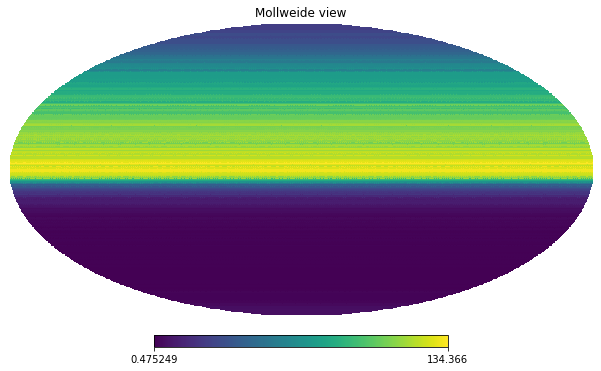

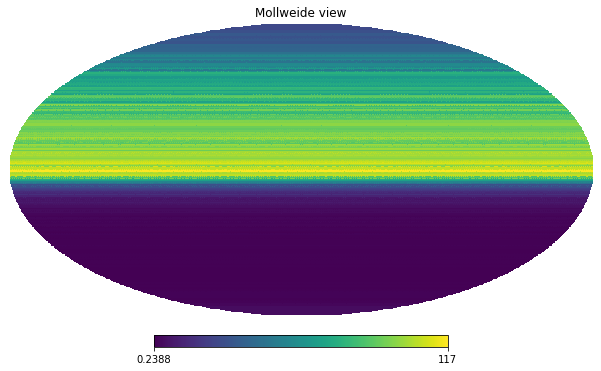

In [9]:
#map = ns.weightedAeff(6)
#hp.mollview(map[3])


hp.mollview(ns.exposuremap_atm[3])
hp.mollview(ns.Aeff_table[30 * 200 + ns.index_coszenith])


0 0 10 100.0 794.3 100.0 1000.0 5.635856915108199
1 10 20 1000.0 7943.0 1000.0 10000.0 4.4767202745365315
2 20 30 10000.0 79430.0 10000.0 100000.0 3.555985313027002
3 30 40 100000.0 794300.0 100000.0 1000000.0 2.8246195364022104
4 40 50 1000000.0 7943000.0 1000000.0 10000000.0 2.243675050118084
5 50 60 10000000.0 79430000.0 10000000.0 100000000.0 1.7822144418552115
6 60 70 100000000.0 794300000.0 100000000.0 1000000000.0 1.4156632514989715


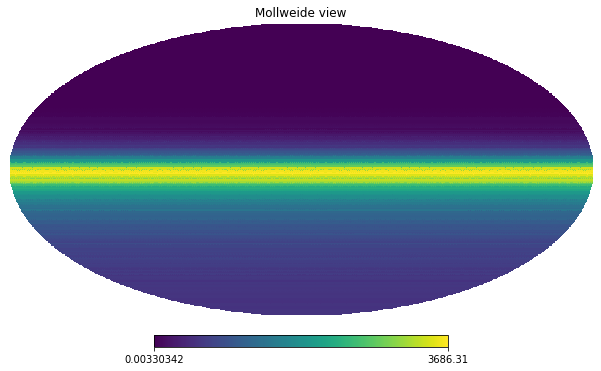

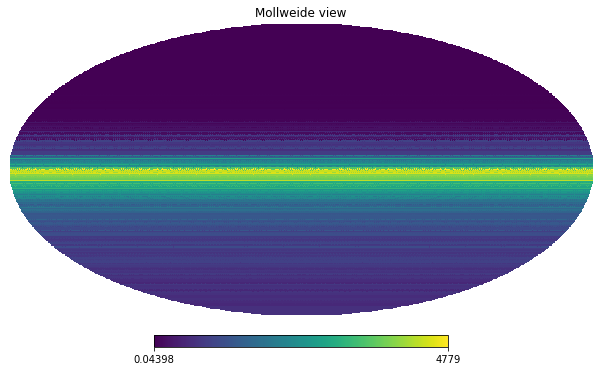

In [13]:
map = ns.weightedAeff(1.1)
#hp.mollview(ns.exposuremap_astro[3])
hp.mollview(map[5])
hp.mollview(cf.exposuremap[5])



In [14]:
map = ns.weightedAeff(1)

0 10 100.0 794.3 100.0 1000.0
10 20 1000.0 7943.0 1000.0 10000.0
20 30 10000.0 79430.0 10000.0 100000.0
30 40 100000.0 794300.0 100000.0 1000000.0
40 50 1000000.0 7943000.0 1000000.0 10000000.0
50 60 10000000.0 79430000.0 10000000.0 100000000.0
60 70 100000000.0 794300000.0 100000000.0 1000000000.0


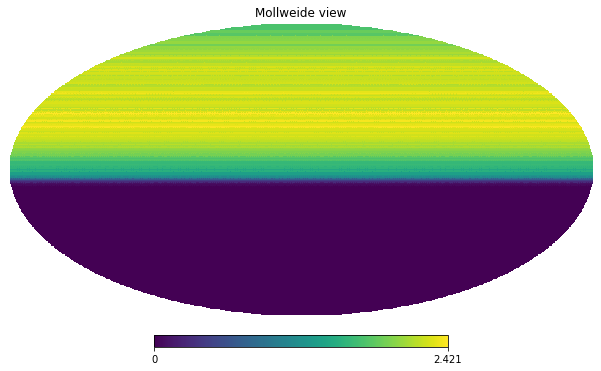

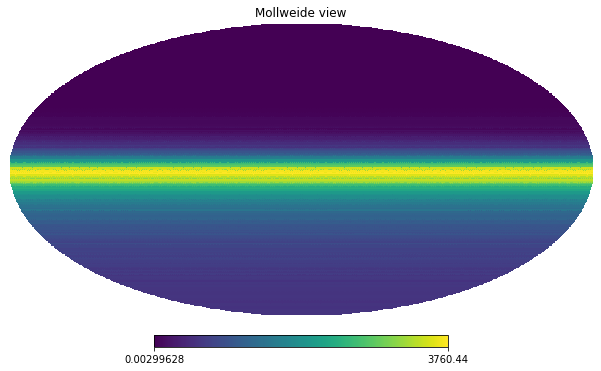

In [25]:
hp.mollview(map[5])

In [2]:
N_yr = 3
galaxyName = 'WISE'
llh = Likelihood(N_yr=N_yr,  galaxyName=galaxyName, computeSTD=False, N_re=100)



0.09999977626883176

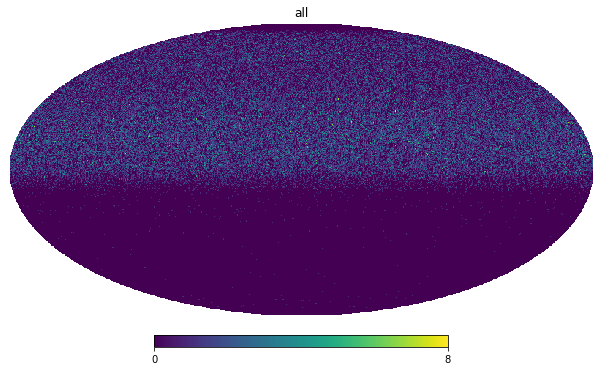

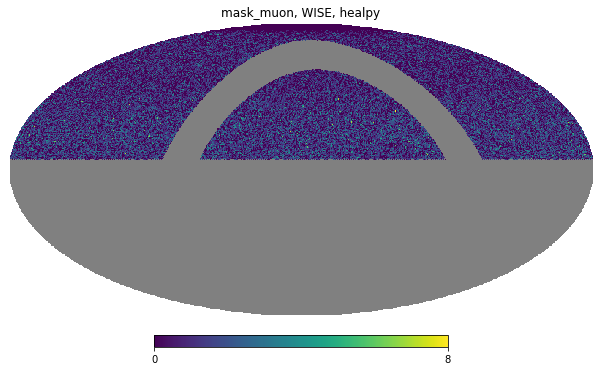

In [36]:
datamap = llh.eg.SyntheticData(N_yr, f_diff=0., density_nu=llh.gs.density)
hp.mollview(datamap[0], title="all")


#datamap = vector_apply_mask(datamap, llh.idx_mask, copy=False)
#hp.mollview(datamap[0], title="mask_muon, WISE")


dm = datamap[0] * 1.0
dm[llh.idx_mask] = hp.UNSEEN
hp.mollview(dm, title="mask_muon, WISE, healpy")



(1e-06, 0.001)

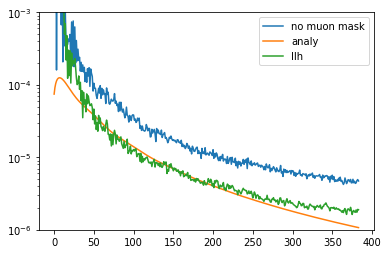

In [5]:
hpMask = hp.pixelfunc.ma(np.ones(Defaults.NPIXEL))
hpMask.mask = llh.gs.mask
plt.plot(np.arange(Defaults.NCL), hp.anafast( llh.gs.overdensity + hpMask),label='no muon mask')

plt.yscale('log')
analyCLpath = os.path.join(Defaults.NUXGAL_ANCIL_DIR, 'Cl_ggRM.dat')
analyCL = np.loadtxt(analyCLpath)
plt.plot(np.arange(Defaults.NCL), analyCL[0:Defaults.NCL], label='analy')
plt.plot(np.arange(Defaults.NCL), llh.w_model_f1[0], label='llh')
#plt.plot(np.arange(Defaults.NCL), llh.w_atm_std[0], label='std')

#plt.plot(np.arange(Defaults.NCL), llh.cf.crossCorrelationFromCountsmap_mask( datamap, llh.gs.overdensity, llh.hpMask )[0], label='mean')

#plt.plot(np.arange(Defaults.NCL), llh.cf.crossCorrelationFromCountsmap( datamap, llh.gs.overdensity )[0], label='mean')



#plt.plot(np.arange(Defaults.NCL), llh.w_atm_mean[1], label='mean')

plt.legend()
plt.ylim(1e-6, 1e-3)

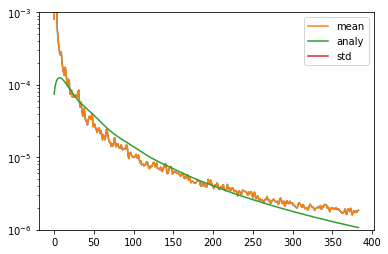

In [41]:
map = llh.gs.overdensity
#map[llh.gs.idx_galaxymask] = hp.UNSEEN

map[llh.idx_mask] = hp.UNSEEN


#hp.mollview(map)
plt.plot(np.arange(Defaults.NCL), hp.anafast(map) )

plt.plot(np.arange(Defaults.NCL), llh.w_model_f1[0], label='mean')
plt.yscale('log')
plt.ylim(1e-6, 1e-3)
analyCLpath = os.path.join(Defaults.NUXGAL_ANCIL_DIR, 'Cl_ggRM.dat')
analyCL = np.loadtxt(analyCLpath)
plt.plot(np.arange(Defaults.NCL), analyCL[0:Defaults.NCL] , label='analy')

plt.plot(np.arange(Defaults.NCL), llh.w_atm_std[0], label='std')


plt.legend()

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na